In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual style
sns.set(style='whitegrid')


In [20]:
# Load the Titanic dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)
df = df.copy()  # Avoid SettingWithCopyWarning


In [21]:
# Show first few rows
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [22]:
# Dataset info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [23]:
# Summary statistics
df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# Drop the 'Cabin' column due to too many missing values
df.drop(columns=['Cabin'], inplace=True)

# Fill missing 'Age' with median
df['Age'] = df['Age'].fillna(df['Age'].median())

# Fill missing 'Embarked' with mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Check for any remaining missing values
df.isnull().sum()

# Missing Data Handling
# - The dataset had missing values:
# - Cabin had too many missing values, so it was dropped.
# - Age was filled with the median age.
# - Embarked was filled with the most common port (mode).


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

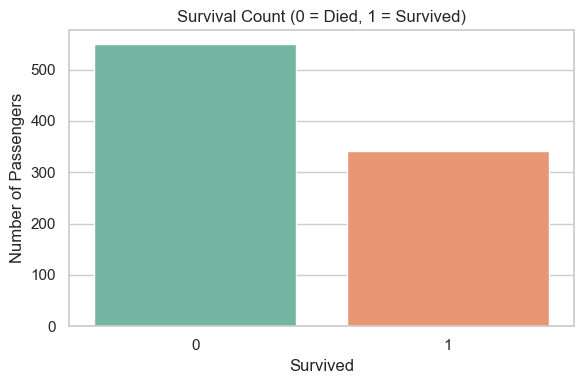

In [40]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', data=df, hue='Survived', legend=False, palette='Set2')
plt.title('Survival Count (0 = Died, 1 = Survived)')
plt.xlabel('Survived')
plt.ylabel('Number of Passengers')
plt.tight_layout()
plt.show()

# Overall Survival Rate
# - Only 38% of passengers survived (Survived = 1), meaning 62% did not survive.
# - This shows a high fatality rate, making factors affecting survival important to analyze.


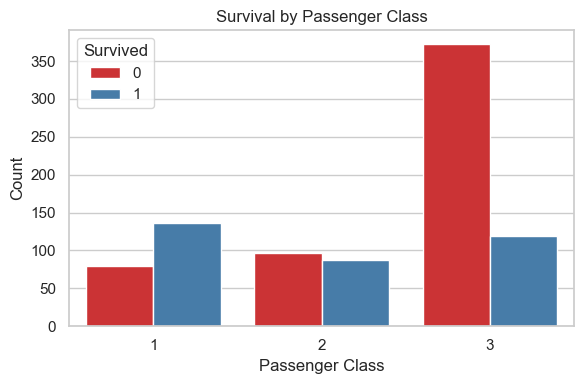

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Pclass', hue='Survived', data=df, palette='Set1')
plt.title('Survival by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Survival by Passenger Class
# - Passengers in 1st class had the highest survival rate.
# - 3rd class passengers had the lowest survival rate.
# - This suggests that wealth and social class had a big influence on survival chances

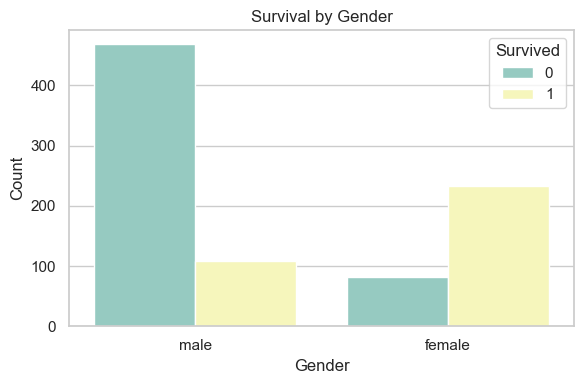

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Sex', hue='Survived', data=df, palette='Set3')
plt.title('Survival by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Survival by Gender
# - Female passengers had a much higher survival rate than males.
# - The "women and children first" policy is clearly reflected in the data.

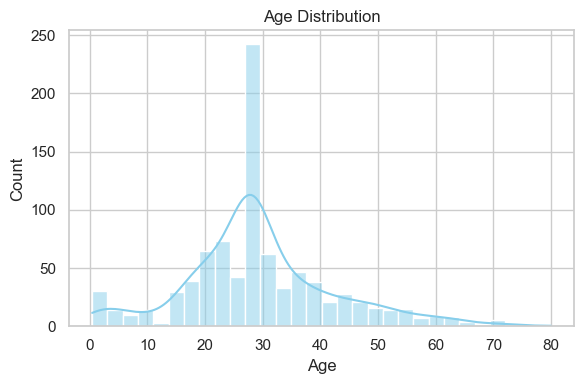

In [ ]:
plt.figure(figsize=(6, 4))
sns.histplot(df['Age'], bins=30, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.tight_layout()
plt.show()

# Age Distribution
# - Most passengers were between 20 and 40 years old.
# - There is a wide range of ages, from infants to seniors (0.42 to 80 years).
# - No specific age group guaranteed survival, but younger passengers (especially children) had relatively better chances.

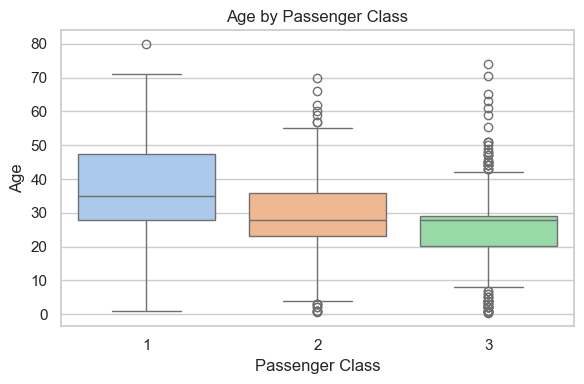

In [ ]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='Pclass', y='Age', data=df, hue='Pclass', legend=False, palette='pastel')
plt.title('Age by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Age')
plt.tight_layout()
plt.show()

# Age by Passenger Class
# - Younger passengers were more common in 3rd class, while older individuals were more common in 1st class.
# - This supports the idea that richer, older passengers were able to afford higher-class tickets.

#### Summary
 **The survival of Titanic passengers was not random. It was influenced by:**
- Gender (females more likely to survive)
- Class (1st class more likely to survive)
- Possibly age (children given priority).